# **HW1**

**Course:** AI5100 (Deep Learning)   
**Student Name:** Janga Tushita Sharva  
**Roll Number:** CS21BTECH11022  
**Date:** 31/08/2024  

In [73]:
import warnings
warnings.filterwarnings("ignore")

### **Question 1**: Unit Norm Ball

#### 1(a)
Formula of norm ball: $\| x \|_p = \left( \sum_{i=1}^{n} |x_i|^p \right)^{\frac{1}{p}} \leq 1$

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def plot_unit_norm_ball(p):
    x = np.linspace(-1.5, 1.5, endpoint=False) # 1.5 because for unit norm ball it is enough
    y = np.linspace(-1.5, 1.5, endpoint=False)
    X, Y = np.meshgrid(x, y)
    Z = np.power(np.power(np.absolute(X), p) + np.power(np.absolute(Y), p), 1/p)

    plt.figure(figsize=(4, 4))
    plt.contour(X, Y, Z, levels=[1], colors='purple')
    plt.title(f'Unit {p}-norm Ball')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

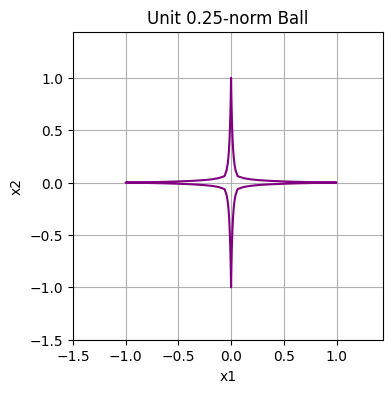

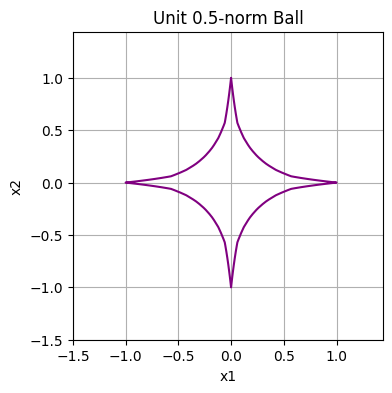

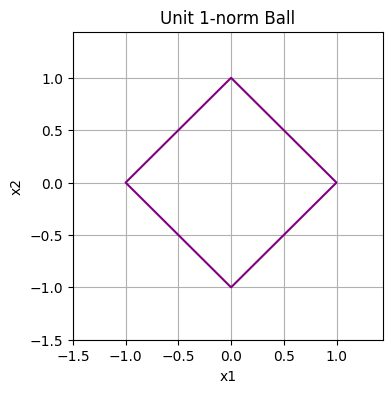

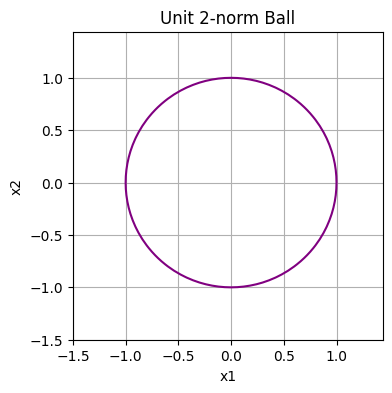

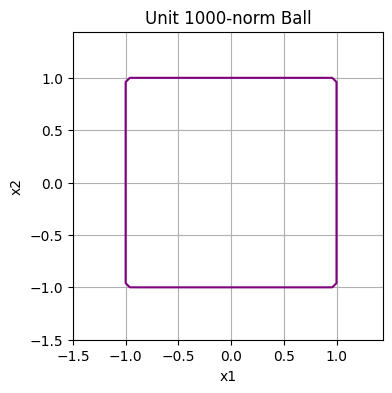

In [75]:
plot_unit_norm_ball(0.25)
plot_unit_norm_ball(0.5)
plot_unit_norm_ball(1)
plot_unit_norm_ball(2)
plot_unit_norm_ball(1000)

#### 1(b)

Yes, from the plots, we observe that the unit norm balls for $p \gt 1$ are convex in nature. Informally, we conclude this from the fact that the line segment joining any two points within the unit norm ball lies entirely inside the region. Formally, this convexity can be described by the inequality:

$f(\frac{x_1 + x_2}{2} \le \frac{f(x_1)}{2} + \frac{f(x_2)}{2})$

However, from the plots, we can observe that the unit norm ball functions for $0 < p < 1$ are concave in nature. Informally, we can say that because line segment joining any two points within the region might lie outside the boundary of the unit norm ball (e.g., line joining (0, 1) and (1, 0)). Formally, concavity is described by the reverse inequality:

$f\left(\frac{x_1 + x_2}{2}\right) \ge \frac{f(x_1)}{2} + \frac{f(x_2)}{2}$


### **Question 2**: Completeness

### Approach
To demonstrate the incompleteness, we will:
1. Let us take a piecewise continuos function. 

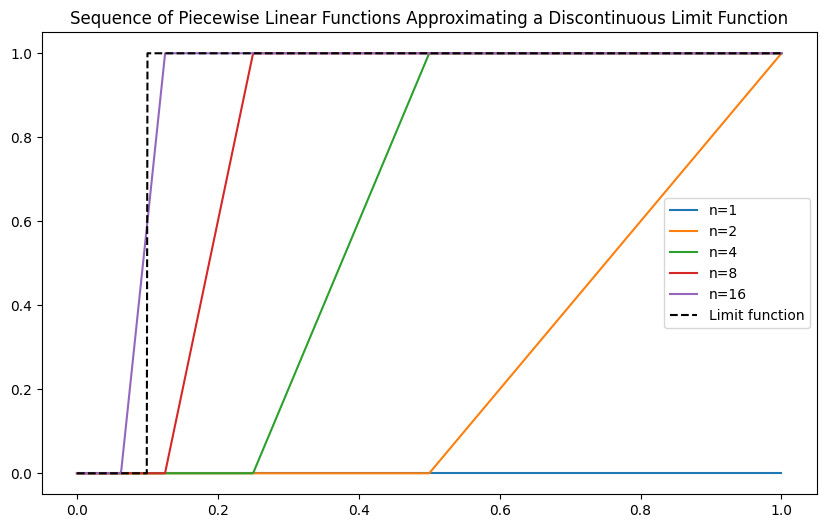

L1 Norm between f_16 and the limit function: 0.01617132648163679


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sequence of functions f_n(x)
def f_n(x, n):
    return np.where(x <= 1/n, 0,
                    np.where(x <= 2/n, n * (x - 1/n),
                             1))

# Define the L1 norm function
def L1_norm(f_n_values, limit_values, x):
    return np.trapz(np.abs(f_n_values - limit_values), x)

# Define the interval
x = np.linspace(0, 1, 1000)

# Plot functions for different n
fig, ax = plt.subplots(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    ax.plot(x, f_n(x, n), label=f'n={n}')

# Add the limit function
# The limit function approaches a step function with a discontinuity at x = 2/n
limit_function = np.where(x < 0.1, 0, 1)  # 0.1 is an arbitrary threshold for visualization
ax.plot(x, limit_function, 'k--', label='Limit function')

ax.set_title("Sequence of Piecewise Linear Functions Approximating a Discontinuous Limit Function")
ax.legend()
plt.show()

# Calculate and print L1 norm between f_16 and the limit function
n = 16
f_n_values = f_n(x, n)
limit_values = np.where(x < 0.1, 0, 1)  # Adjust threshold for visualization
l1_norm = L1_norm(f_n_values, limit_values, x)
print(f"L1 Norm between f_16 and the limit function: {l1_norm}")

In this problem, I used a sequence of piecewise linear functions to show that the space of continuous functions on the interval $[0, 1]$, called $ C[0, 1] $, is incomplete with respect to the $ L_1 $ norm.

The sequence of functions as it shows how continuous functions can came close to a function that isn’t continuous. As $ n $ gets larger, the functions $ f_n(x) $ get closer and closer to a "step function" that jumps at a certain point (like a staircase). This step function isn't continuous, so it doesn’t belong to $ C[0, 1] $.

In a complete space, every sequence that gets closer together (a Cauchy sequence) should end up at a point within the same space. But in this case, the sequence of continuous functions ends up at a function that isn’t continuous. This shows that not all Cauchy sequences in $ C[0, 1] $ have a limit within $ C[0, 1] $, proving that the space is incomplete.

### **Question 3**: Entropy of a discrete random variable

#### 3(a)  
Formula of entropy of a discrete random variable: $-\sum_{x \in X} p(x) log (p(x))$  
Note: Though an array is sufficient for the purpose of entropy, I used dictonary for just representation purpose

In [77]:
import numpy as np

def find_entropy_discrete(pmf):
    entropy = 0.0
    if not np.isclose(sum(pmf.values()), 1):
        print("The sum is not equal/close to 1. Invalid pmf. Theoretical entropy = ", end="")
    for probability in pmf.values():
        if(probability > 0):
            entropy -= probability * np.log2(probability)
    return entropy

pmf1 = {0: 0.75, 1: 0.25}
print(find_entropy_discrete(pmf1))

pmf2 = {0: 1, 1: 0, 2: 0}
print(find_entropy_discrete(pmf2))

pmf3 = {0: 1, 1: 1, 2: 0}
print(find_entropy_discrete(pmf3))

pmf4 = {0: 1/3, 1: 1/3, 2: 1/3}
print(find_entropy_discrete(pmf4))

pmf5 = {0: 0.333, 1: 0.333, 2: 0.333}
print(find_entropy_discrete(pmf5))

0.8112781244591328
0.0
The sum is not equal/close to 1. Invalid pmf. Theoretical entropy = 0.0
1.584962500721156
The sum is not equal/close to 1. Invalid pmf. Theoretical entropy = 1.584819511673234


#### 3(b)
Bernoulli: X = 0 has probability p, and X = 1 has probability 1-p

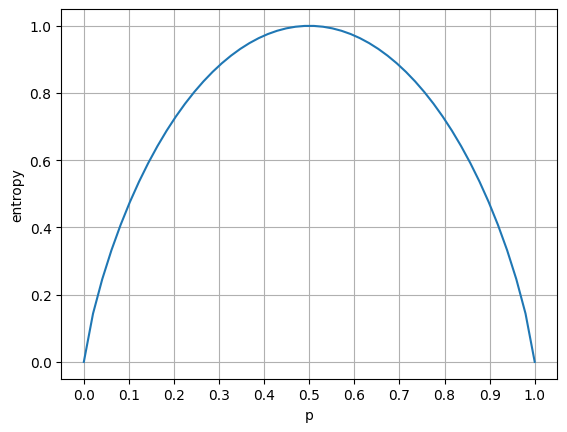

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli():
    p = np.linspace(0, 1, endpoint=True)
    entropies = []
    for prob in p:
        pmf = {0: prob, 1: 1-prob}
        entropy = find_entropy_discrete(pmf)
        entropies.append(entropy)
    plt.plot(p, entropies)
    plt.xticks(np.arange(min(pmf), max(pmf)+0.1, 0.1))
    plt.xlabel('p')
    plt.ylabel('entropy')
    plt.grid(True)
    plt.show()

bernoulli()

As we can from the above plot, the maximum is obtained at p = 0.5. It is expected, because the number of bits needed would be maximum at when both of the events have equal probabilities, and hence entropy is expected to be maximum then. 

### **Question 4**: Joint Entropy
$H(\mathcal{Y} \mid \mathcal{X})=\sum_{x \in \mathcal{X}} p(x) H(y \mid x=x) \\$  
$\text { Where } H(y \mid x=x)=-\sum_{y \in y} p(y \mid x) \log (p(y \mid x)) \\$  
$\Rightarrow H(\mathcal{Y} \mid \mathcal{X})=-\sum_{x \in x} p(x) \sum_{y \in y} p(y \mid x) \log (p(y \mid x)) \\$  
$=-\sum_{x \in X} \sum_{y \in y} p(x) \cdot \frac{p(y, x)}{\left(p(x)\right)} \log \left(\frac{p(x, y)}{p(x)}\right) \\$  
$=-\sum_{x \in X} \sum_{y \in y} p(x, y)[\log (p(x, y))-\log (p(x))] \\$  
$=-\sum_{x \in X} \sum_{y \in y} p(x, y) \log (p(x, y))+\sum_{x \in X} \sum_{y \in y} p(x, y) \log (p(x)) \\$  
$= H(\mathcal{X}, \mathcal{Y})+\sum_{x \in \mathcal{X}} \log (p(x)) \sum_{y \in y} p(x, y) \\$  
$= H(\mathcal{X}, \mathcal{Y})+\sum_{x \in \mathcal{X}} \log (p(x)) p(x)\\$  
$\implies H(\mathcal{Y} \mid \mathcal{X}) = H(\mathcal{X}, \mathcal{Y})-H(\mathcal{X})\\$  
$\implies H(\mathcal{X}, \mathcal{Y}) = H(\mathcal{Y} \mid \mathcal{X}) + H(\mathcal{X})\\$

### **Question 5**: Mutual Information
 $$I(\mathcal{X} ; \mathcal{Y})=\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} \log \left(\frac{p(x, y)}{p(x) p(y)}\right) p(x, y)$$
$\begin{aligned}  
 \text { (a) } & =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}}\left[\log \left(\frac{p(x, y)}{p(y)}\right) p(x, y)-\log (p(x)) \cdot p(x, y)\right] \\  
 = & \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}y} p(y) \times \frac{p(x, y)}{p(y)} \log \left(\frac{p(x, y)}{p(y)}\right)-\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x, y) \log (p(x)) \\ 
 = & \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(y) \times p(x \mid y) \log (p(x \mid y))-\sum_{x \in \mathcal{X}} \log(p(x)) \sum_{y \in \mathcal{Y}} p(x, y) \\ 
 = & \sum_{y \in \mathcal{Y}} p(y)(-H(x \mid y=y))-\sum_{x \in \mathcal{X}} \log (p(x)) p(x) \\ 
 = & -H(\mathcal{X} \mid \mathcal{Y})+H(\mathcal{X})=H(\mathcal{X})-H(\mathcal{X} \mid \mathcal{Y}) \\
 \implies & I(\mathcal{X} ; \mathcal{Y}) = H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X})
\end{aligned}$  

$\begin{aligned}  
 \text { (b) } & =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}}\left[\log \left(\frac{p(x, y)}{p(x)}\right) p(x, y)-\log (p(y)) \cdot p(x, y)\right] \\  
 = & \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}y} p(x) \times \frac{p(x, y)}{p(x)} \log \left(\frac{p(x, y)}{p(x)}\right)-\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x, y) \log (p(y)) \\ 
 = & \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x) \times p(y \mid x) \log (p(y \mid x))-\sum_{y \in \mathcal{Y}} \log(p(y)) \sum_{x \in \mathcal{X}} p(x, y) \\ 
 = & \sum_{x \in \mathcal{X}} p(x)(-H(y \mid x=x))-\sum_{y \in \mathcal{Y}} \log (p(y)) p(y) \\ 
 = & -H(\mathcal{Y} \mid \mathcal{X})+H(\mathcal{Y})=H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X}) \\
 \implies & I(\mathcal{X} ; \mathcal{Y}) = H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X})
\end{aligned}$ 

$\text{Hence Proved: } I(\mathcal{X}; \mathcal{Y}) = H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X}) = H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X})$

### **Question 6: Numerical Exercise**
Given $p(x=0, y=0) = p(x=0, y=1) = p(x=1, y=1)=\frac{1}{3} ; p(x=1, y=0) = 0$  
Find the following:

#### 6a:  
$H(X), H(Y)$  
$$H(X) = -\sum_{x \in \mathcal{X}} p(x) log(p(x))$$  
$X = \{0, 1\}$  
Using marginal, we have  
$p(x = 0) = p(x=0, y=0)+p(x=0,y=1) = \frac{2}{3}$ and  
$p(x = 1) = p(x=1, y=0)+p(x=1,y=1) = \frac{1}{3}$  
  
$\implies H(X) = -p(0) log(p(0)) - p(1) log(p(1))$  
$\implies H(X) = -\displaystyle\frac{2}{3} log(\displaystyle\frac{2}{3}) - \displaystyle\frac{1}{3} log(\displaystyle\frac{1}{3})$  
$\implies H(X) = 0.919$ bits  
  
Similarly, for $H(Y)$, we have
$$H(Y) = -\sum_{y \in \mathcal{Y}} p(y) log(p(y))$$  
$Y = \{0, 1\}$  
Using marginal, we have  
$p(y = 0) = p(x=0, y=0)+p(x=1,y=0) = \frac{1}{3}$ and  
$p(y = 1) = p(x=0, y=1)+p(x=1,y=1) = \frac{2}{3}$  
  
$\implies H(Y) = -p(0) log(p(0)) - p(1) log(p(1))$  
$\implies H(Y) = -\displaystyle\frac{2}{3} log(\displaystyle\frac{2}{3}) - \displaystyle\frac{1}{3} log(\displaystyle\frac{1}{3})$  
$\implies H(Y) = 0.919$ bits 

In [79]:
print((1/3) * np.log2(1/3) + (2/3) * np.log2(2/3)) # rough work for 6a question

-0.9182958340544896


#### 6(b)
$H(X|Y), H(Y|X)$  
$$H(Y|X) = - \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} p(x,y) log\left(\displaystyle\frac{p(x,y)}{p(x)}\right)$$  
$$H(X|Y) = - \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} p(x,y) log\left(\displaystyle\frac{p(x,y)}{p(y)}\right)$$  
Given Given $p(x=0, y=0) = p(x=0, y=1) = p(x=1, y=1)=\frac{1}{3} ; p(x=1, y=0) = 0$  
We have $p(X = 0) = p(Y = 1) = \frac{2}{3}$ and $p(X = 1) = P(Y = 0) = \frac{1}{3}$  


So we iterate with (x, y) = {(0,0), (0,1), (1,0), (1,1)}
#### H(Y|X)
$$H(Y|X) = - \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} p(x,y) log\left(\displaystyle\frac{p(x,y)}{p(x)}\right)$$  
$\implies H(Y|X) = -p(x = 0, y = 0) log\left(\frac{p(x=0,y=0)}{p(x=0)}\right) - p(x = 0, y = 1) log\left(\frac{p(x=0,y=1)}{p(x=0)}\right) - p(x = 1, y = 0) log\left(\frac{p(x=1,y=0)}{p(x=1)}\right) - p(x = 1, y = 1) log\left(\frac{p(x=1,y=1)}{p(x=1)}\right)$  
$\implies H(Y|X) = -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{2}{3}}\right) -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{2}{3}}\right) - 0 \times log_{2}\left(\frac{0}{\frac{1}{3}}\right) -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{1}{3}}\right)$  
$\implies H(Y|X) = \frac{1}{3} + \frac{1}{3} + 0 + 0$  
$\implies H(Y|X) = \frac{2}{3} = 0.67 bits$


#### H(X|Y)
$$H(X|Y) = - \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} p(x,y) log\left(\displaystyle\frac{p(x,y)}{p(y)}\right)$$  
$\implies H(X|Y) = -p(x = 0, y = 0) log\left(\frac{p(x=0,y=0)}{p(y=0)}\right) - p(x = 0, y = 1) log\left(\frac{p(x=0,y=1)}{p(y=1)}\right) - p(x = 1, y = 0) log\left(\frac{p(x=1,y=0)}{p(y=0)}\right) - p(x = 1, y = 1) log\left(\frac{p(x=1,y=1)}{p(y=1)}\right)$  

$\implies H(X|Y) = -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{1}{3}}\right) -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{2}{3}}\right) - 0 \times log_{2}\left(\frac{0}{\frac{1}{3}}\right) -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{2}{3}}\right)$  

$\implies H(X|Y) = 0 + \frac{1}{3} + 0 + \frac{1}{3}$  
$\implies H(X|Y) = \frac{2}{3} = 0.67 bits$

#### 6(c)
$H(X, Y)$  
$\text{From the result of 4th question, we have}$  
$$H(X, Y) = H(X) + H(Y \mid X)$$
$\implies H(X, Y) = 0.909 + 0.67 = 1.579$

#### 6(d)
$H(Y) - H(Y \mid X)\\$  
$\text{From the results obtained in 6(a) and 6(b), we have}\\$  
$H(Y) = 0.919 bits \text{ and } H(Y \mid X) = 0.67bits\\$  
$\implies H(Y) - H(Y \mid X) = 0.919 - 0.67 = 0.249 bits$  

#### 6(e)
$I(X;Y)$
$\text{From the proof of 5th question, we have}$  
$$I(X;Y) = H(Y) - H(Y \mid X)$$  
$\implies I(X;Y) = 0.249 bits$

### **Question 7**: Image Entropy

#### 7(a)

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# One which does not use the numpy library function
def get_normalized_historgram_of_image(filepath):
    img = np.asarray(Image.open(filepath))
    freq = np.zeros(256)
    num_pixels = img.size
    for i in img:
        for j in i:
            freq[j] += 1
    freq = freq/num_pixels
    
    return freq

def plot_histogram(filepath):
    freq = get_normalized_historgram_of_image(filepath)
    plt.figure(figsize=(14, 8))
    plt.bar(range(256), freq, color='skyblue', edgecolor='black')
    plt.grid(True)
    plt.xlabel('Intensity')
    plt.ylabel('Normalized frequency')
    plt.title('Normalized Histogram')
    plt.show()

# One which uses numpy library function
def get_normalized_historgram_of_image2(filepath):
    img = np.asarray(Image.open(filepath))
    pixel_values = img.flatten()
    plt.figure(figsize=(14, 8))
    plt.hist(pixel_values, bins=256, range=(0, 255), density=True, color='skyblue', edgecolor='black')
    plt.grid(True)
    plt.xlabel('Intensity')
    plt.ylabel('Normalized frequency')
    plt.title('Normalized Histogram')
    plt.show()

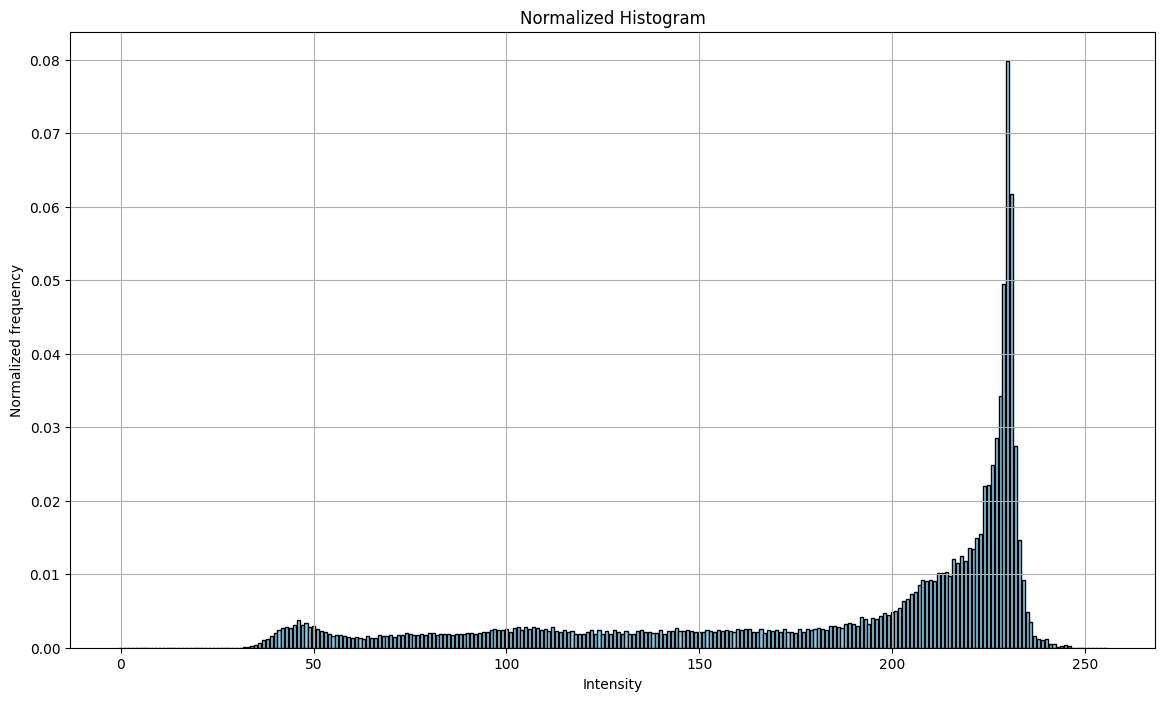

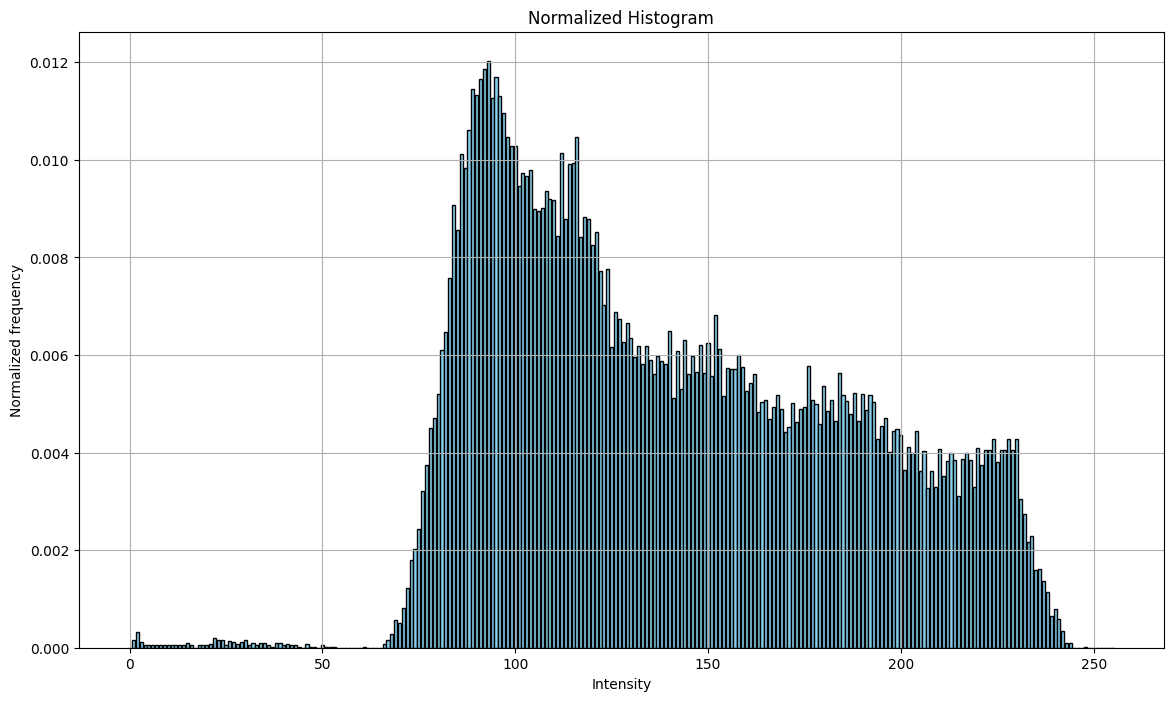

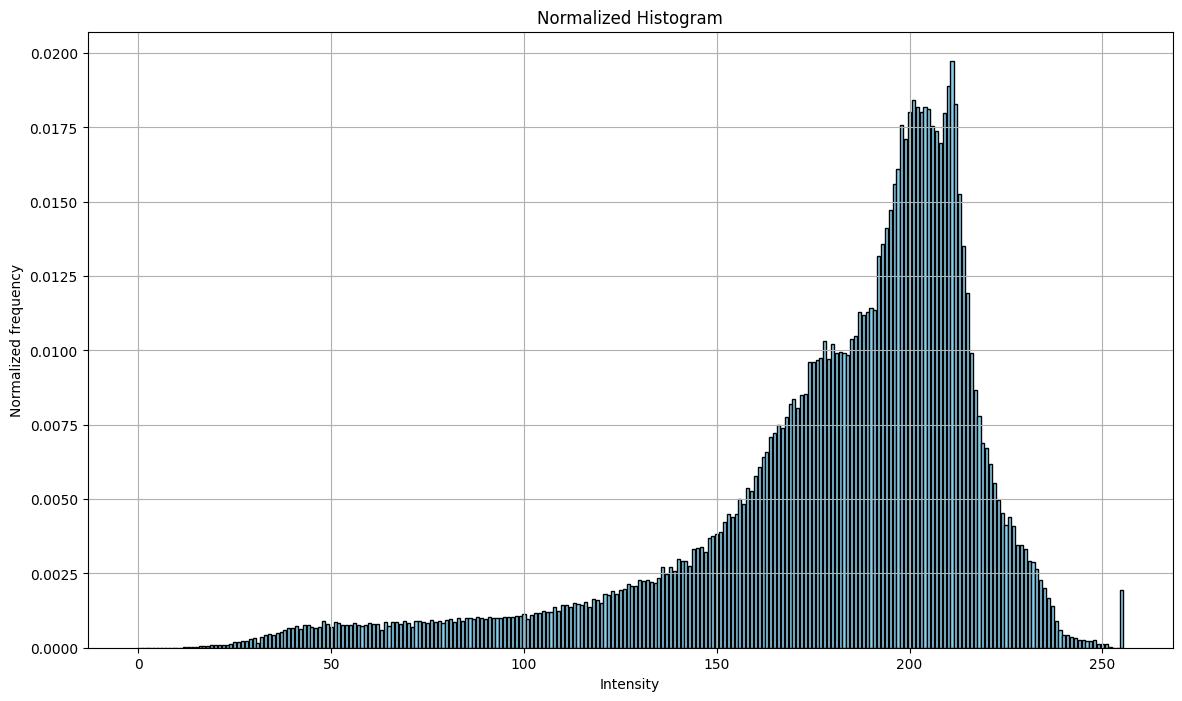

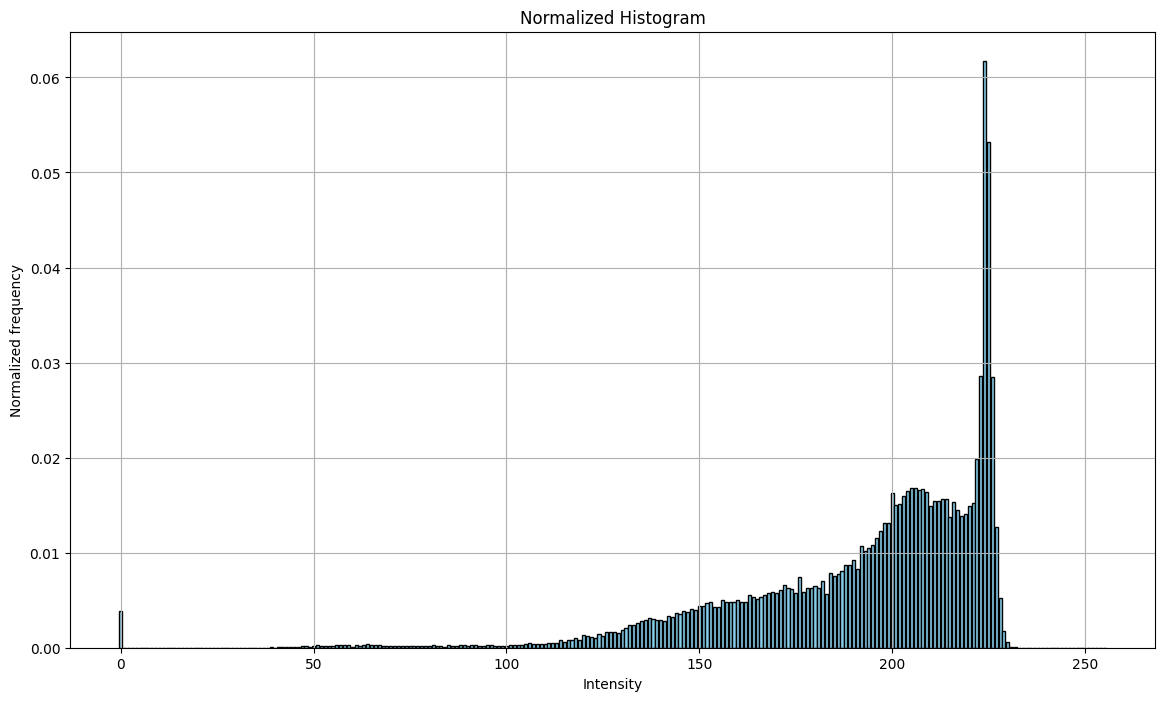

In [81]:
# For clock:
plot_histogram('5.1.12.tiff')

# For aerial-1
plot_histogram('5.1.10.tiff')

#For aerial-2
plot_histogram('5.2.09.tiff')

# For aeroplane
plot_histogram('5.1.11.tiff')

#### 7(b)

In [82]:
import numpy as np
from PIL import Image

# Modifying the previously used function to take arrays as input
def find_entropy_discrete(pmf):
    entropy = 0.0
    if not np.isclose(sum(pmf), 1):
        print("The sum is not equal/close to 1. Invalid pmf. Theoretical entropy = ", end="")
    for probability in pmf:
        if(probability > 0):
            entropy -= probability * np.log2(probability)
    return entropy

def get_image_entropy(filepath):
    img = np.asarray(Image.open(filepath))
    freq = np.zeros(256)
    num_pixels = img.size
    for i in img:
        for j in i:
            freq[j] += 1
    freq = freq/num_pixels
    
    entropy = find_entropy_discrete(freq)
    return entropy

print(get_image_entropy('5.1.12.tiff'))
print(get_image_entropy('5.1.10.tiff'))
print(get_image_entropy('5.1.11.tiff'))
print(get_image_entropy('5.2.09.tiff'))
#6.705667200666731

6.705667200666731
7.3118072232599625
6.452275232463874
6.993994166346505


### **Question 8**: Joint PMF and Joint Entropy

#### 8(a)

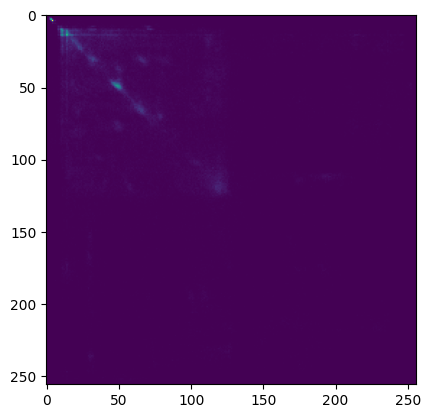

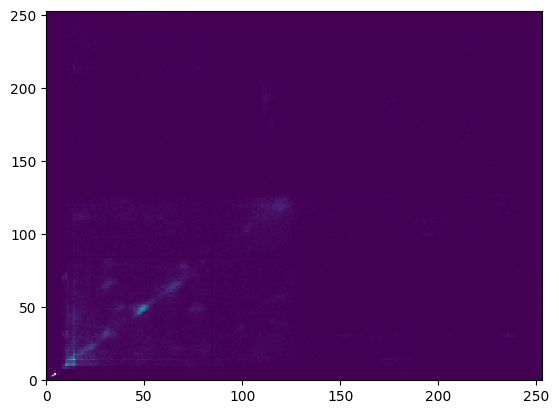

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def get_normalized_joint_histogram(left, right):
    left_image = np.asarray(Image.open(left))
    right_image = np.asarray(Image.open(right))

    if left_image.shape != right_image.shape:
        print("Both should be of same dimesnions")
        return None
    
    joint_histogram = np.zeros((256, 256))
    # Meaning of joint histogram: How often pairs of pixel with intensity i in left image corresponds to pixel with intensity j in right image

    for i in range(0, left_image.shape[0]): # i from 0 to img.rows
        for j in range(0, left_image.shape[1]): # j from 0 to img.cols
            left_img_pixel_intensity = left_image[i][j]
            right_img_pixel_intensity = right_image[i][j]
            joint_histogram[left_img_pixel_intensity][right_img_pixel_intensity] += 1
    
    joint_histogram = joint_histogram/(left_image.size)
    return joint_histogram


def plot_joint_histogram(left, right):
    joint_histogram = get_normalized_joint_histogram(left, right)
    plt.imshow(joint_histogram) #method 1
    plt.show()
    left_image = np.asarray(Image.open(left))
    right_image = np.asarray(Image.open(right))
    plt.hist2d(left_image.flatten(), right_image.flatten(), bins=(256,256)) #method 2
    plt.show()

# Example usage:
plot_joint_histogram('left.png', 'right.png')

#### 8(b)

In [84]:
import numpy as np
INVALID_PMF = -1

def get_joint_entropy(pmf):
    x_values = pmf.shape[0]
    y_values = pmf.shape[1]

    if np.sum(pmf) != 1:
        return INVALID_PMF

    joint_entropy = 0
    for i in range(x_values):
        for j in range(y_values):
            prob = pmf[i][j]
            if prob > 0:
                joint_entropy -= prob * np.log2(prob)
    
    return joint_entropy

joint_pmf = np.array([[0.1, 0.2, 0.1],
                      [0.1, 0.1, 0.2],
                      [0.1, 0.05, 0.05]])

joint_pmf = np.array([[1/4, 1/4],[1/4, 1/4]])

print(get_joint_entropy(joint_pmf))

2.0


#### 8(c)

In [85]:
import numpy as np

joint_pmf = get_normalized_joint_histogram('left.png', 'right.png')
joint_entropy = get_joint_entropy(joint_pmf)

print(joint_entropy)

-1


### **Question 9**: Conditional PMF and Conditional Entropy

#### 9(a)

In [86]:
import numpy as np

def get_conditional_pmf(joint_pmf, conditioning_index, conditioning_value):
    # Sum over the axis to get the marginal distribution
    marginal_pmf = np.sum(joint_pmf, axis=conditioning_index)
    
    # Conditional PMF
    if conditioning_index == 0:
        conditional_pmf = joint_pmf[conditioning_value, :] / marginal_pmf[conditioning_value]
    elif conditioning_index == 1:
        conditional_pmf = joint_pmf[:, conditioning_value] / marginal_pmf[conditioning_value]
    
    return conditional_pmf

#### 9(b)

In [87]:
def get_conditional_entropy(joint_pmf, conditioning_index):
    # Calculate the marginal PMF by summing manually
    marginal_pmf = np.zeros(joint_pmf.shape[conditioning_index])
    
    if conditioning_index == 0:
        for y in range(joint_pmf.shape[0]):
            sum_value = 0.0
            for x in range(joint_pmf.shape[1]):
                sum_value += joint_pmf[y, x]
            marginal_pmf[y] = sum_value
    
    elif conditioning_index == 1:
        for y in range(joint_pmf.shape[1]):
            sum_value = 0.0
            for x in range(joint_pmf.shape[0]):
                sum_value += joint_pmf[x, y]
            marginal_pmf[y] = sum_value

    # Calculate the conditional entropy manually
    conditional_entropy = 0.0
    
    for y in range(joint_pmf.shape[conditioning_index]):
        if marginal_pmf[y] > 0:
            if conditioning_index == 0:
                sum_log_pmf = 0.0
                for x in range(joint_pmf.shape[1]):
                    conditional_pmf = joint_pmf[y, x] / marginal_pmf[y] if marginal_pmf[y] > 0 else 0
                    sum_log_pmf += conditional_pmf * np.log2(conditional_pmf + 1e-12)
                
            elif conditioning_index == 1:
                sum_log_pmf = 0.0
                for x in range(joint_pmf.shape[0]):
                    conditional_pmf = joint_pmf[x, y] / marginal_pmf[y] if marginal_pmf[y] > 0 else 0
                    sum_log_pmf += conditional_pmf * np.log2(conditional_pmf + 1e-12)
                
            conditional_entropy -= marginal_pmf[y] * sum_log_pmf
    
    return conditional_entropy

#### 9(c)

In [88]:
normalized_joint_hist = get_normalized_joint_histogram('left.png', 'right.png')
print(normalized_joint_hist.shape)
print(get_conditional_entropy(normalized_joint_hist, 0))
print(get_conditional_entropy(normalized_joint_hist, 1))

(256, 256)
6.416909158412585
6.396577731470238


### **Question 10**: KL Divergence

#### 10(a)

In [89]:
import numpy as np

ERROR_UNEQUAL_SPACES = -1
ERROR_INVALID_PMF = -2

def find_kl_divergence(p, q):
    if p.keys() != q.keys():
        return ERROR_UNEQUAL_SPACES 
    
    if not (np.isclose(sum(p.values()), 1)) or not (np.isclose(sum(q.values()), 1)):
        return ERROR_INVALID_PMF
    
    divergence = 0.0
    for key in p.keys():
        if p[key] > 0.0 and q[key] > 0.0:
            divergence += p[key] * np.log2(p[key]/q[key])
        elif q[key] == 0.0:
            divergence = float('inf')
    
    return divergence

p = {0: 2/3, 1: 1/3}
q = {0: 0, 1: 1}
print(find_kl_divergence(p, q))
print(find_kl_divergence(q, p))

inf
1.584962500721156


#### 10(b)
Have $p = Bernoulli(r), q = Bernoulli(s)$

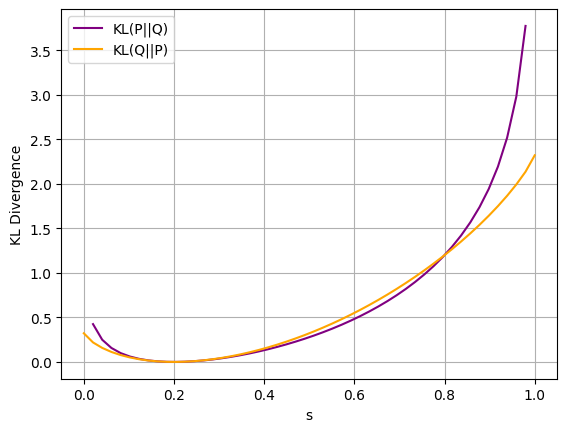

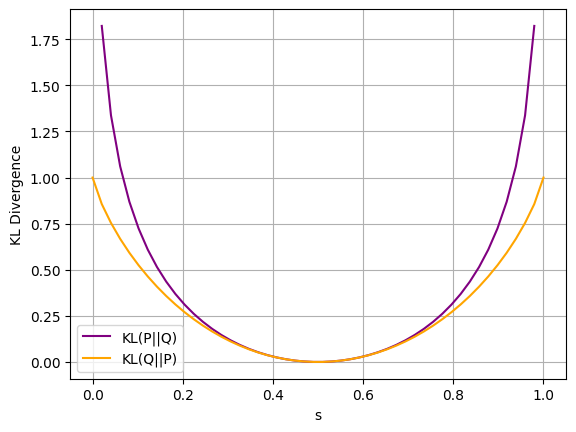

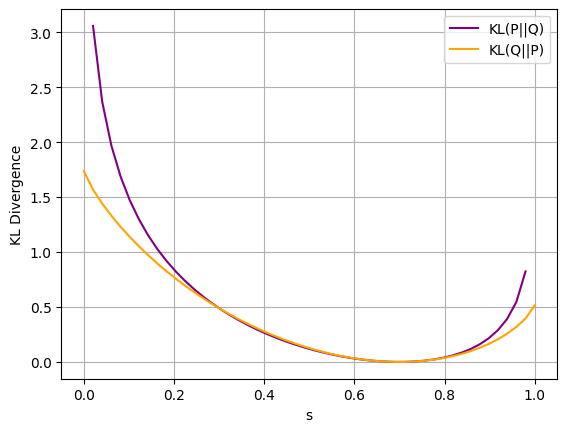

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def plot_kl_divergence(r):
    s_space = np.linspace(0, 1)
    divergence_pq = []
    divergence_qp = []
    for s in s_space:
        p = {0: r, 1: 1-r} # pmf for bernolli(r)
        q = {0: s, 1: 1-s} # pmf for bernoulli(s)
        divergence_pq.append(find_kl_divergence(p, q))
        divergence_qp.append(find_kl_divergence(q, p))
    plt.plot(s_space, divergence_pq, color='purple', label='KL(P||Q)')
    plt.plot(s_space, divergence_qp, color='orange', label='KL(Q||P)')
    plt.grid(True)
    plt.xlabel('s')
    plt.ylabel('KL Divergence')
    plt.legend()
    plt.show()

plot_kl_divergence(0.2)
plot_kl_divergence(0.5)
plot_kl_divergence(0.7)

(i) Plots are above  
(ii) As we see, the plots donot go below 0.0, hence non-negative  
(iii) Using plots, we can see that for all the above plots, both divergences are equal to 0 only when s is equal to the input (r) we gave. Theoretically
$$\mathcal{D(p || q)} = \sum_{x\in \mathcal{X}} p(x) \log\left(\frac{p(x)}{q(x)}\right)$$  
Sum of terms are zero only when each of the induvidual term is 0  
All $p(x)$ cannot be zero at a time because sum should be 1. 
Therefore, $p(x)$ should be equal to $q(x)$ for all $x \in \mathcal{X}$.  
Following bernoulli's definition, $r$ should be equal to $s$.


(iv) Since the normalized histograms we are getting are in the form of matrix, let us define a new function, because the existing one used dictionaries. I want to keep those dictionaries because I want them to demonstrate that spaces being equal is important.

In [91]:
import numpy as np

def calculate_entropy_between_images(image1path, image2path):
    img1_normalised_hist = get_normalized_historgram_of_image(image1path)
    img2_normalised_hist = get_normalized_historgram_of_image(image2path)
    divergence = 0.0
    for i in range(256):
        if img1_normalised_hist[i] > 0.0 and img2_normalised_hist[i] > 0.0:
            divergence += img1_normalised_hist[i] * np.log2(img1_normalised_hist[i]/img2_normalised_hist[i])
    
    return divergence

print(calculate_entropy_between_images('right.png', 'left.png'))
print(calculate_entropy_between_images('left.png', 'right.png'))

0.014409785833354494
0.015104015237387055


As it follows from above, we can see that the divergence is significantly lesser which is because both images are very similar. Though it gives a good measure for similarity, it remains questionable to use this approach directly because D(p || q) is not necessarily equal to D(q || p). We would expect that the result should be symmetrical. Hence, it cannot be the perfect metric for this.